# Task_1 : The Sparks Foundation - Prediction using Supervised ML

# Author : Shruti Jaiswal 


Objective : Predict the percentage of an student based on the no. of study hours 

In [1]:
# import packages 
# for data handling
import pandas as pd
import numpy as np

# for charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for stats test
import scipy.stats as stats

In [2]:
# predictive modelling
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
data.head() # first 5 records of the data. 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Inspection 

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The above information reflects that we have no null values and both the values are of numerical type.

Five point Summary - Statistical Data 

In [6]:
data.describe()  

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above data mean > median (50%), the data is skewed.

In [7]:
# no of variables.
data.shape

(25, 2)

Assumption checks 

Very first assumtion is that all the variables should be normally distributed.

Distribution of variables on the basis of Scores.

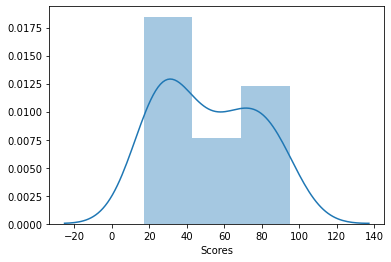

In [8]:
sns.distplot(data['Scores'])
plt.show()

The above "Scrore" data shows that it is skewed.

We generally apply log transformation:log is rescalling the data and making the distribution normal. In this case, size of data set is small, normalization may not take place. We can proceed with the given data. 


Plotting the distribution of scores 

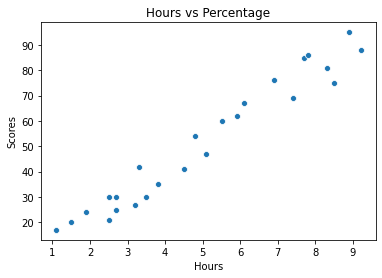

In [9]:
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
sns.scatterplot(x= 'Hours', y= "Scores", data=data)
plt.show ()

 We have a linear relation between the number of hours studied and percentage of score.

In [10]:
# Linearity: correlation matrix (ranges from 1 to -1)
corrm = data.corr()
corrm

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


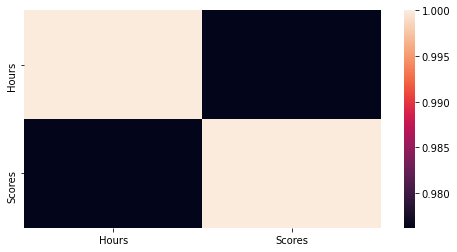

In [11]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (8, 4))
sns.heatmap(data.corr())

# Split the data for model building 

In [12]:
# Divide the data into training and testing
train, test = train_test_split(data, test_size = 0.2, random_state = 0)

In [13]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  20  |  No of obs in testing:  5


# Building a linear regression model

In [14]:
# Used OLS regression formula and fit the model. 
lm0 = smf.ols('''Scores ~ Hours''', train).fit()

In [15]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.79e-13
Time:                        20:50:42   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0182      3.057      0.660      0.5

In [16]:
test['pred_scores'] = lm0.predict(test)

<ipython-input-16-13e12b9b694d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_scores'] = lm0.predict(test)


In [17]:
test['pred_scores'] 

5     16.884145
2     33.732261
19    75.357018
16    26.794801
11    60.491033
Name: pred_scores, dtype: float64

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': test['Scores'], 'Predicted': test['pred_scores']})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [19]:
# Accuracy metrics (MSE: Mean Squared Error)
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test['Scores'], test['pred_scores'])) 

Mean Absolute Error: 4.183859899002981


In [20]:
# Accuracy metrics (RMSE: Root Mean Squared Error)
RMSE_test = np.sqrt(mean_squared_error(test.Scores,test.pred_scores)).round(3)

# print the values of RMSE 
print('RMSE of testing data: ', RMSE_test)

RMSE of testing data:  4.647


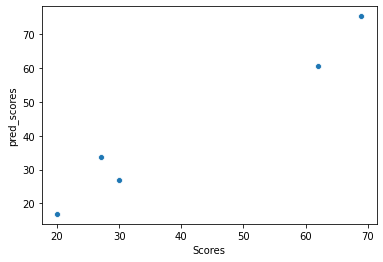

In [21]:
# Plotting Actual vs predicted scores. 
sns.scatterplot(test.Scores, test.pred_scores)